# Decision Trees and Ensemble Methods Notebook  (written by Dr. Xan Morice-Atkinson)

## Overview

### What are "Decision Trees"?

Basically, Decision Trees ([wiki](https://en.wikipedia.org/wiki/Decision_tree)) are simple flowcharts with maths. They can be used for both classification and regression tasks. They are easy to understand and interpret, and they can be visualized. They don't require feature scaling or centering, and they can handle both numerical and categorical data. However, they are prone to overfitting, especially when the tree is "deep".

There is [quite a bit of underlying math](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation), but the basic idea is to split the data into subsets based on the value of a "feature" (column of data). 

In classification tasks, the split is done in such a way that the subsets are as "pure" as possible. The purity of a subset can be measured using the _Gini impurity_ or the _entropy_ ([here's a quick explainer](https://archive.is/Hfj2F)). The process is repeated recursively until the subsets are "pure" or some stopping criteria are met.
In regression tasks, the _Mean Squared Error_ or _Mean Poisson deviance_ is used to measure the quality of a split.

### Helpful Resources

Scikit Learn:
- [Decision Trees](https://scikit-learn.org/1.5/modules/tree.html)
- [Ensemble Methods](https://scikit-learn.org/1.5/modules/ensemble.html)

[This Medium post explainer](https://archive.is/ZmWT2)

## Notebook Structure 


__First Half__:

[Classification](#Classification):  

1. [Importing Libraries](#clf_imports)  

2. [Generating Data](#clf_data_gen)  

3. [Plotting Data](#clf_plot_data)  

4. [Training a Decision Tree](#clf_decision_tree)  

5. [Print the parameters of the Decision Tree](#clf_params)

6. [Visualizing the Decision Tree](#clf_visualize)  

7. [Feature Importance](#clf_feat_imp)  

8. [Decision Boundaries](#clf_boundaries)  
  
  
  
__Second Half__:

[Regression](#Regression):  

1. [Loading Data](#reg_load_data)  

2. [Plot Data](#reg_plot_data)  

3. [Training decision tree models](#reg_decision_tree)

__Exercises start here!__

4. [Print the parameters of the decision tree models](#reg_params)

5. [Feature Importance](#reg_feat_imp)

6. [Training ensemble models](#reg_ensemble)  

7. [Print the parameters of the ensemble models](#reg_ensemble_params)

8. [Visualizing the ensemble models](#reg_ensemble_visualize)

9. [Feature Importance](#reg_feat_imp)  

10. [Model Tuning](#reg_tuning)

11. [Feature Engineering!](#reg_feat_eng)

12. [Plotting the new features](#reg_feat_eng_plot)

12. [Training ensemble models on the new features](#reg_ensemble_feat_eng)

13. [New Feature Importance](#reg_new_feat_imp)

## Datasets

Data is the most important part of any machine learning model. The performance of a model is not only highly dependent on the quality of the data, but also _your understanding of the data_. In this notebook, we will be using [generated datasets](https://scikit-learn.org/1.5/auto_examples/datasets/plot_random_dataset.html) for classification tasks, and ... [__NOT__ the Boston Housing Prices dataset](https://scikit-learn.org/1.1/modules/generated/sklearn.datasets.load_boston.html#sklearn-datasets-load-boston) for regression tasks - we will instead use the [California House Prices](https://scikit-learn.org/1.5/datasets/real_world.html#california-housing-dataset) dataset.

I put the Boston House Prices dataset here to highlight how important it is to understand the data you are working with!

### Software Packages

- [**Scikit-learn**](https://scikit-learn.org/1.5/modules/ensemble.html) (This is what this notebook will use)
- [XGBoost](https://xgboost.readthedocs.io/en/stable/)
- [LightGBM](https://lightgbm.readthedocs.io/en/stable/)

---

## Classification <a class="anchor" id="Classification"></a>

### Imports <a class="anchor" id="clf_imports"></a>

In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

### Generate the data for classification tasks <a id="clf_data_gen"></a>

In [2]:
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles, fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
# Generate 3 different datasets for classification

n_features = 4

X1, Y1 = make_classification(n_samples=1000, n_features=n_features, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3)
X2, Y2 = make_blobs(n_samples=1000, n_features=n_features, centers=3)
X3, Y3 = make_gaussian_quantiles(n_samples=1000, n_features=n_features, n_classes=3)

# Train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=42)


dataset_names = ['make_classification', 'make_blobs', 'make_gaussian_quantiles']
X_train_datasets = [X_train1, X_train2, X_train3]
y_train_datasets = [y_train1, y_train2, y_train3]
X_test_datasets = [X_test1, X_test2, X_test3]
y_test_datasets = [y_test1, y_test2, y_test3]

### Plot the datasets <a id="clf_plot_data"></a>

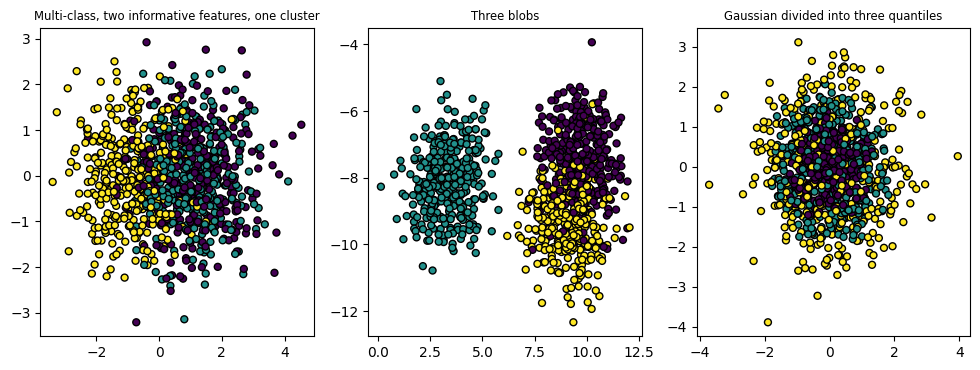

In [4]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.title("Multi-class, two informative features, one cluster", fontsize="small")
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

plt.subplot(132)
plt.title("Three blobs", fontsize="small")
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor="k")

plt.subplot(133)
plt.title("Gaussian divided into three quantiles", fontsize="small")
plt.scatter(X3[:, 0], X3[:, 1], marker="o", c=Y3, s=25, edgecolor="k")

plt.show()

In [9]:
data1 = pd.DataFrame(X1, columns=['F0', 'F1', 'F2', 'F3']).join(pd.DataFrame(Y1, columns=['label']))
data2 = pd.DataFrame(X2, columns=['F0', 'F1', 'F2', 'F3']).join(pd.DataFrame(Y2, columns=['label']))
data3 = pd.DataFrame(X3, columns=['F0', 'F1', 'F2', 'F3']).join(pd.DataFrame(Y3, columns=['label']))

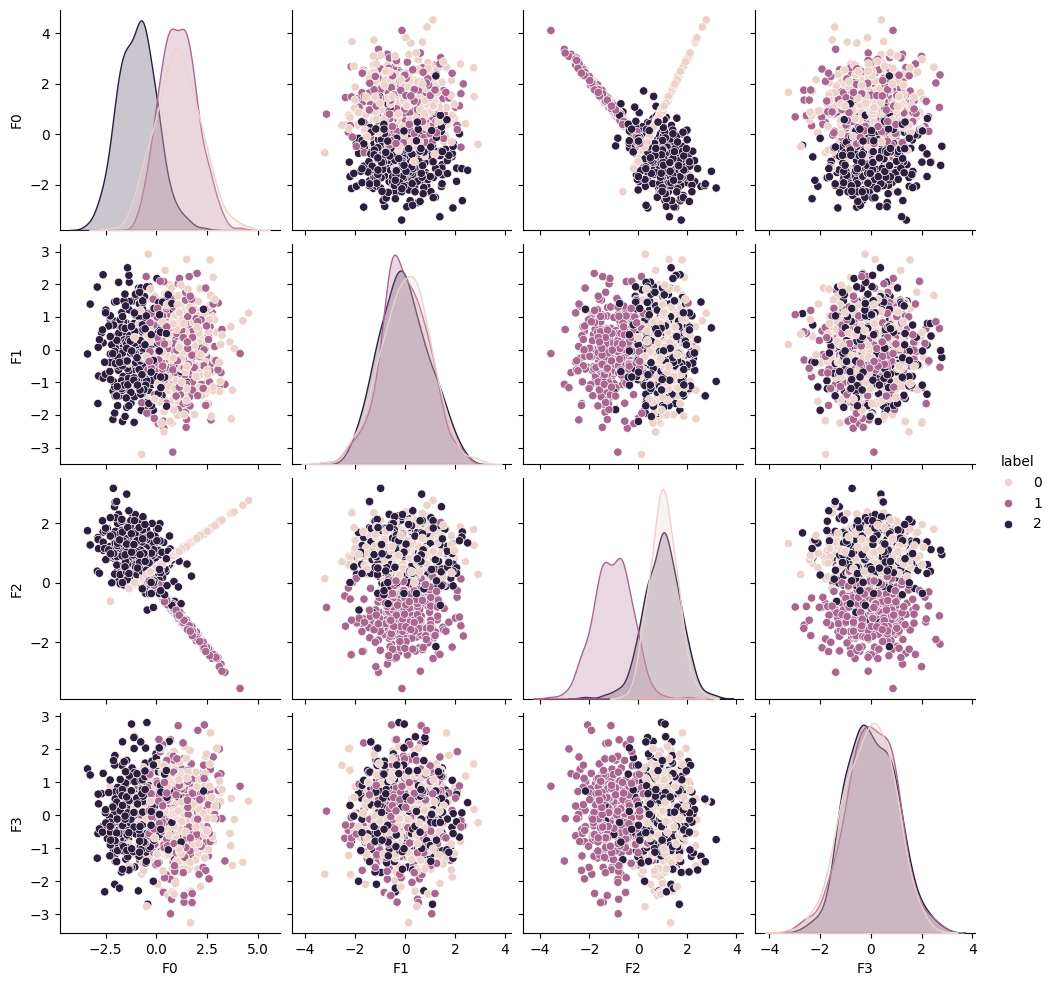

In [6]:
sns.pairplot(data1, hue='label')

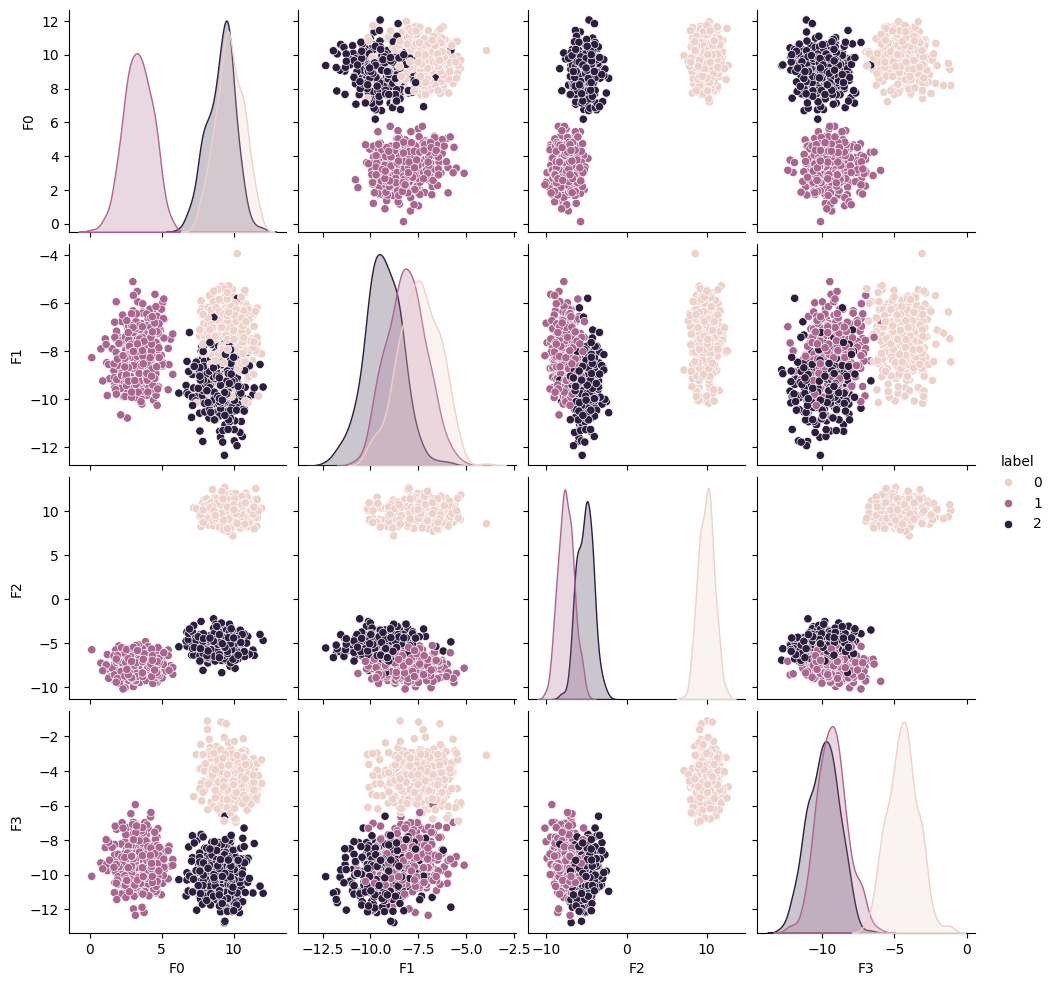

In [7]:
sns.pairplot(data2, hue='label')

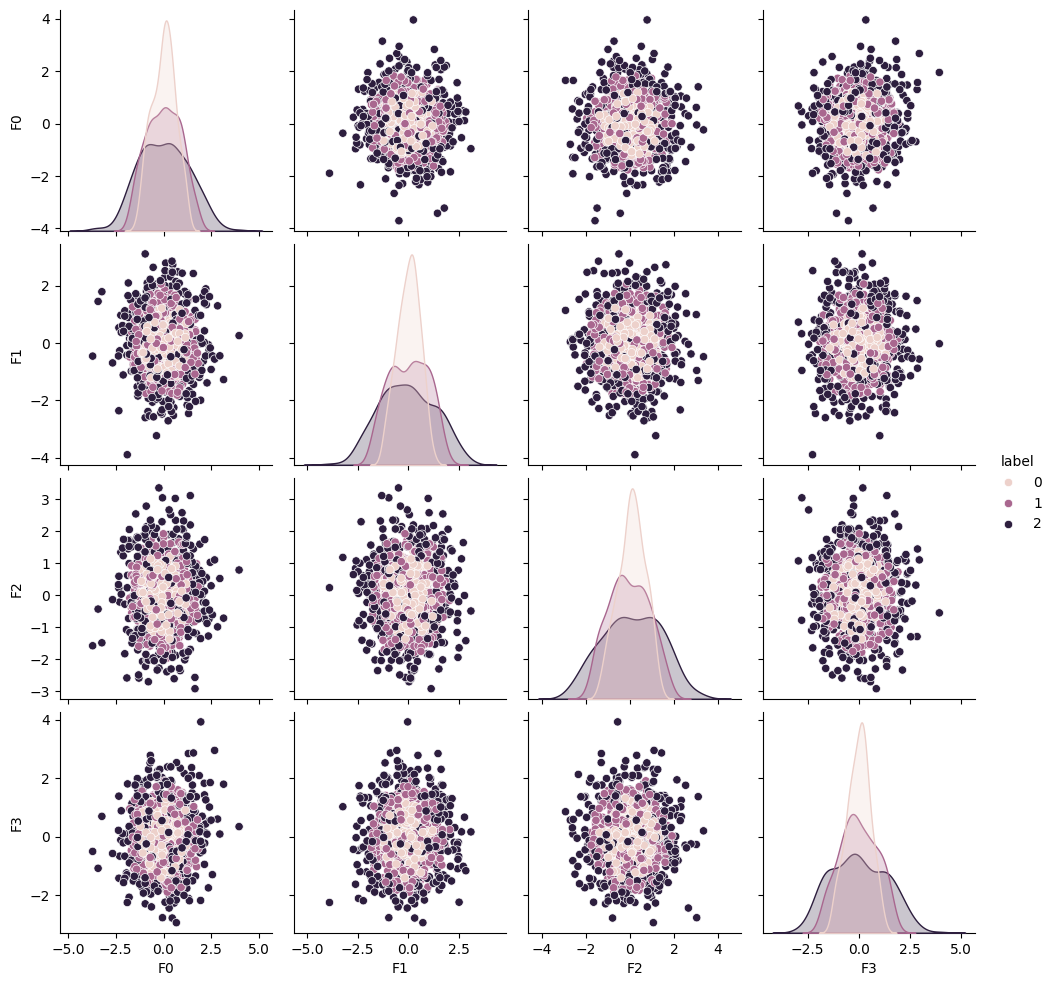

In [8]:
sns.pairplot(data3, hue='label')

### Decision Trees - Classification <a id="clf_decision_tree"></a>

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# For each dataset, train a decision tree classifier and print the accuracy
trained_dt_classifiers = []

for i in range(len(dataset_names)):
    clf = DecisionTreeClassifier()
    clf.fit(X_train_datasets[i], y_train_datasets[i])
    trained_dt_classifiers.append(clf)
    train_accuracy = clf.score(X_train_datasets[i], y_train_datasets[i])
    test_accuracy = clf.score(X_test_datasets[i], y_test_datasets[i])
    print(f"Training accuracy on {dataset_names[i]}: {train_accuracy}")
    print(f"Testing accuracy on {dataset_names[i]}: {test_accuracy}")


Training accuracy on make_classification: 1.0
Testing accuracy on make_classification: 0.895
Training accuracy on make_blobs: 1.0
Testing accuracy on make_blobs: 1.0
Training accuracy on make_gaussian_quantiles: 1.0
Testing accuracy on make_gaussian_quantiles: 0.845


### Model parameters <a id="clf_params"></a>

In [11]:
# Get the parameters of the tree (depth, number of nodes, etc.)
for i in range(len(dataset_names)):
    clf = trained_dt_classifiers[i]
    n_nodes = clf.get_depth()
    n_leaves = clf.get_n_leaves()
    model_params = clf.get_params()
    model_params_df_dt_clf = pd.DataFrame([model_params]).T
    print(f"Metrics for {dataset_names[i]}:")
    print(f"nodes: {n_nodes},")
    print(f"leaves: {n_leaves},") 
    print(f"model parameters:")
    display(model_params_df_dt_clf)
    print("\n")

Metrics for make_classification:
nodes: 14,
leaves: 68,
model parameters:


,0
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0




Metrics for make_blobs:
nodes: 2,
leaves: 3,
model parameters:


,0
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0




Metrics for make_gaussian_quantiles:
nodes: 17,
leaves: 128,
model parameters:


,0
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


### Visualizing the Decision Tree <a id="clf_visualize"></a>

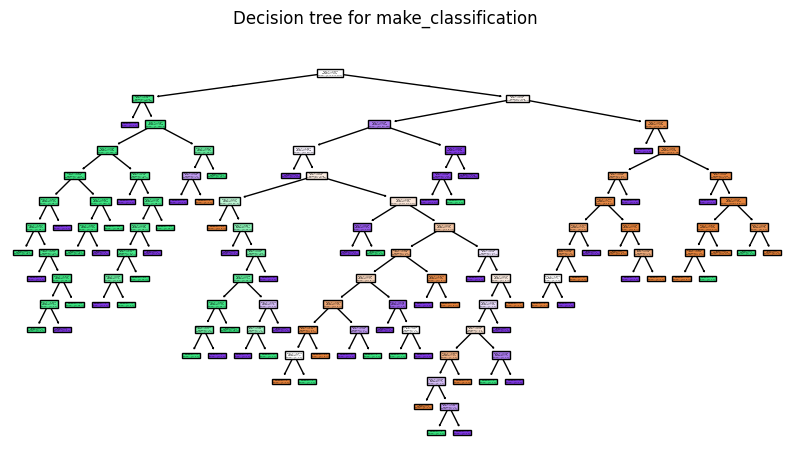

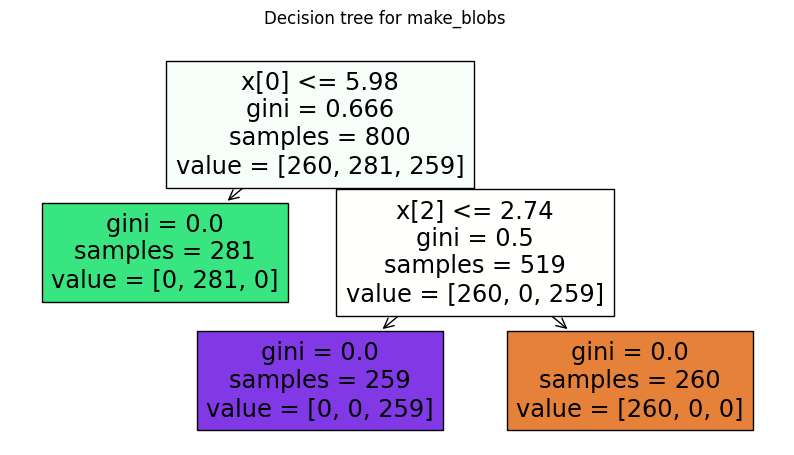

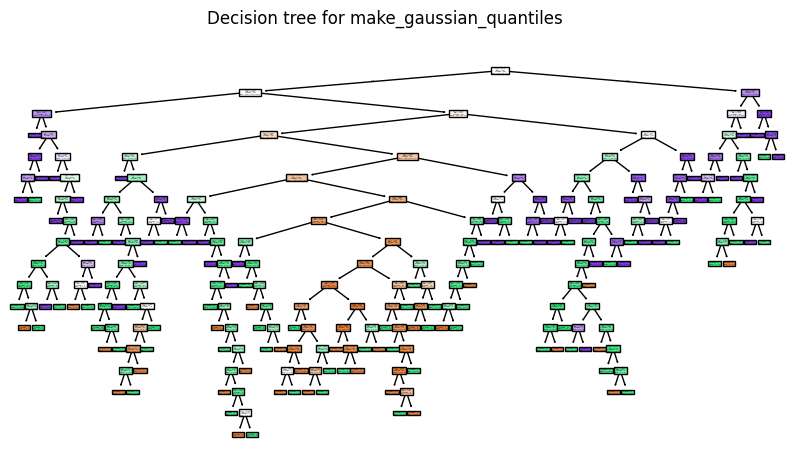

In [12]:
# Plot the decision trees
for i in range(len(dataset_names)):
    clf = trained_dt_classifiers[i]
    fig = plt.figure(figsize=(10, 5))
    plt.suptitle(f"Decision tree for {dataset_names[i]}")
    tree.plot_tree(clf, filled=True)
    plt.show()
    fig.clear()

### Feature Importance <a id="clf_feat_imp"></a>

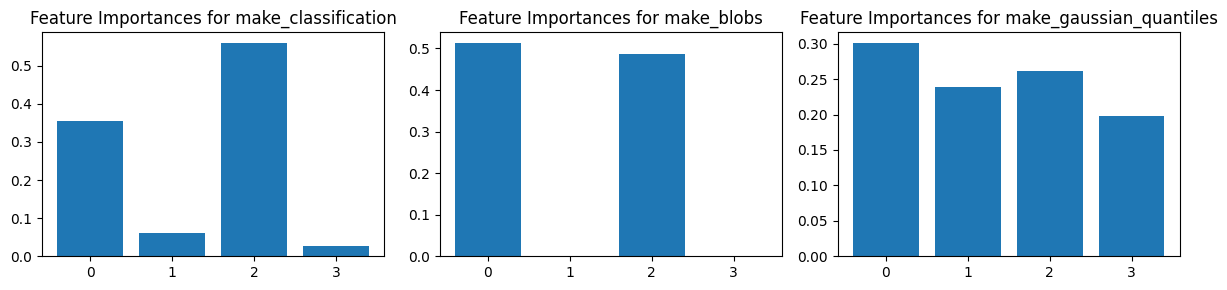

In [13]:
# Assess the feature importance
# Define the number of rows and columns for the subplot grid
num_datasets = len(dataset_names)
cols = 3  # Number of columns
rows = (num_datasets + cols - 1) // cols  # Calculate the required rows dynamically

# Create the subplot figure
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))  # Adjust the size as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each dataset and plot the feature importances
for i in range(num_datasets):
    clf = trained_dt_classifiers[i]
    importances = clf.feature_importances_
    
    # Plot feature importances
    axes[i].bar(range(len(importances)), importances)
    axes[i].set_xticks(range(len(importances)))
    axes[i].set_xticklabels(range(len(importances)))
    axes[i].set_title(f"Feature Importances for {dataset_names[i]}")

# Remove unused subplots (if any)
for j in range(num_datasets, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


### Plot the decision surfaces of a decision tree <a id="clf_boundaries"></a>

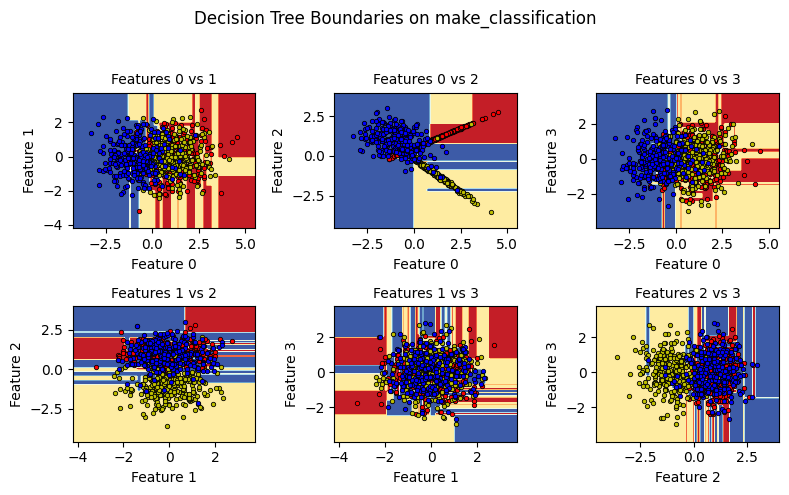

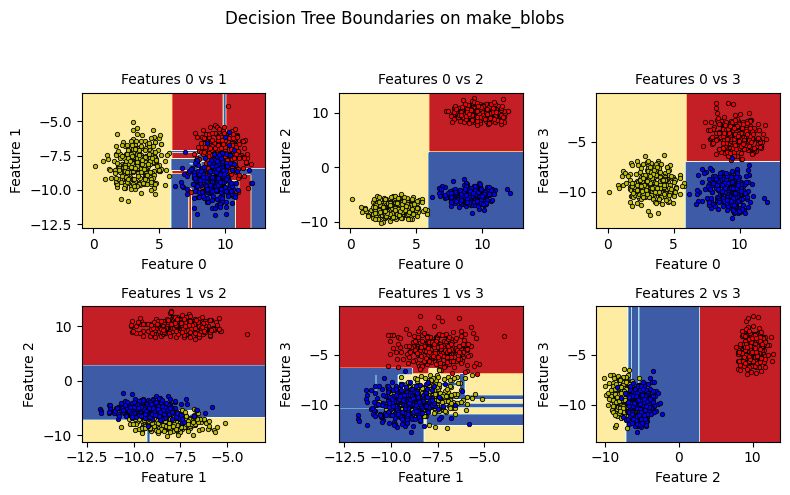

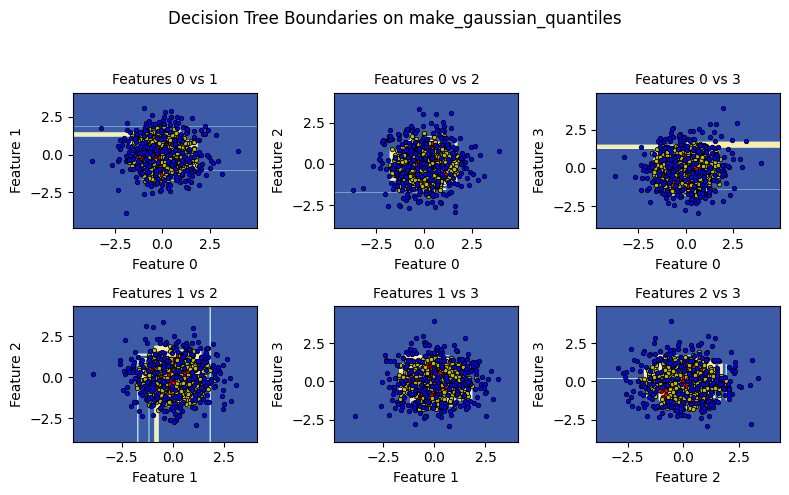

In [14]:
# Plot the decision boundaries
from sklearn.inspection import DecisionBoundaryDisplay

# Parameters
n_classes = 3
plot_colors = "ryb"
feature_names = [f"Feature {i}" for i in range(n_features)]
feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

for dataset_idx, dataset_name in enumerate(dataset_names):
    X_train = X_train_datasets[dataset_idx]
    y_train = y_train_datasets[dataset_idx]

    clf = DecisionTreeClassifier()
    # Create subplots for feature pairs
    fig, pair_axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 5))
    fig.suptitle(
        f"Decision Tree Boundaries on {dataset_name}",
        fontsize=12,
    )

    for pairidx, pair in enumerate(feature_pairs):
        X = X_train[:, pair]
        y = y_train

        # Train the model on the selected features
        clf.fit(X, y)

        # Plot the decision boundary
        ax = pair_axes[pairidx // 3, pairidx % 3]
        DecisionBoundaryDisplay.from_estimator(
            clf,
            X,
            cmap=plt.cm.RdYlBu,
            response_method="predict",
            ax=ax,
            xlabel=feature_names[pair[0]],
            ylabel=feature_names[pair[1]],
        )

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            ax.scatter(
                X[idx, 0],
                X[idx, 1],
                c=color,
                label=f"Class {i}",
                edgecolor="black",
                linewidth=0.6,
                s=10,
            )

        ax.set_title(f"Features {pair[0]} vs {pair[1]}", fontsize=10)

        # Adjust layout for feature-pair plots
        plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


---

### What are "Ensemble Methods"?

Ensemble methods (in this context) are usually collections of decision trees that are combined in different ways to make predictions. They are used to improve the performance beyond that of a single decision tree. The most popular ensemble methods are Random Forests and Gradient Boosting. __They can be used for both classification and regression tasks.__

Gradient Boosting: Builds trees sequentially, each tree trying to correct the errors of the previous one. The trees are usually shallow.

Random Forest: Builds trees in parallel, each tree is trained on a random subset of the data. The trees are usually deep.

## Regression <a class="anchor" id="Regression"></a>

### Load the data <a class="anchor" id="reg_load_data"></a>

In [15]:
# Load the california housing dataset for regression

california = fetch_california_housing()
X_california = california.data
y_california = california.target
df_california = pd.DataFrame(data=X_california, columns=california.feature_names)
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

### Plot the data <a class="anchor" id="reg_plot_data"></a>

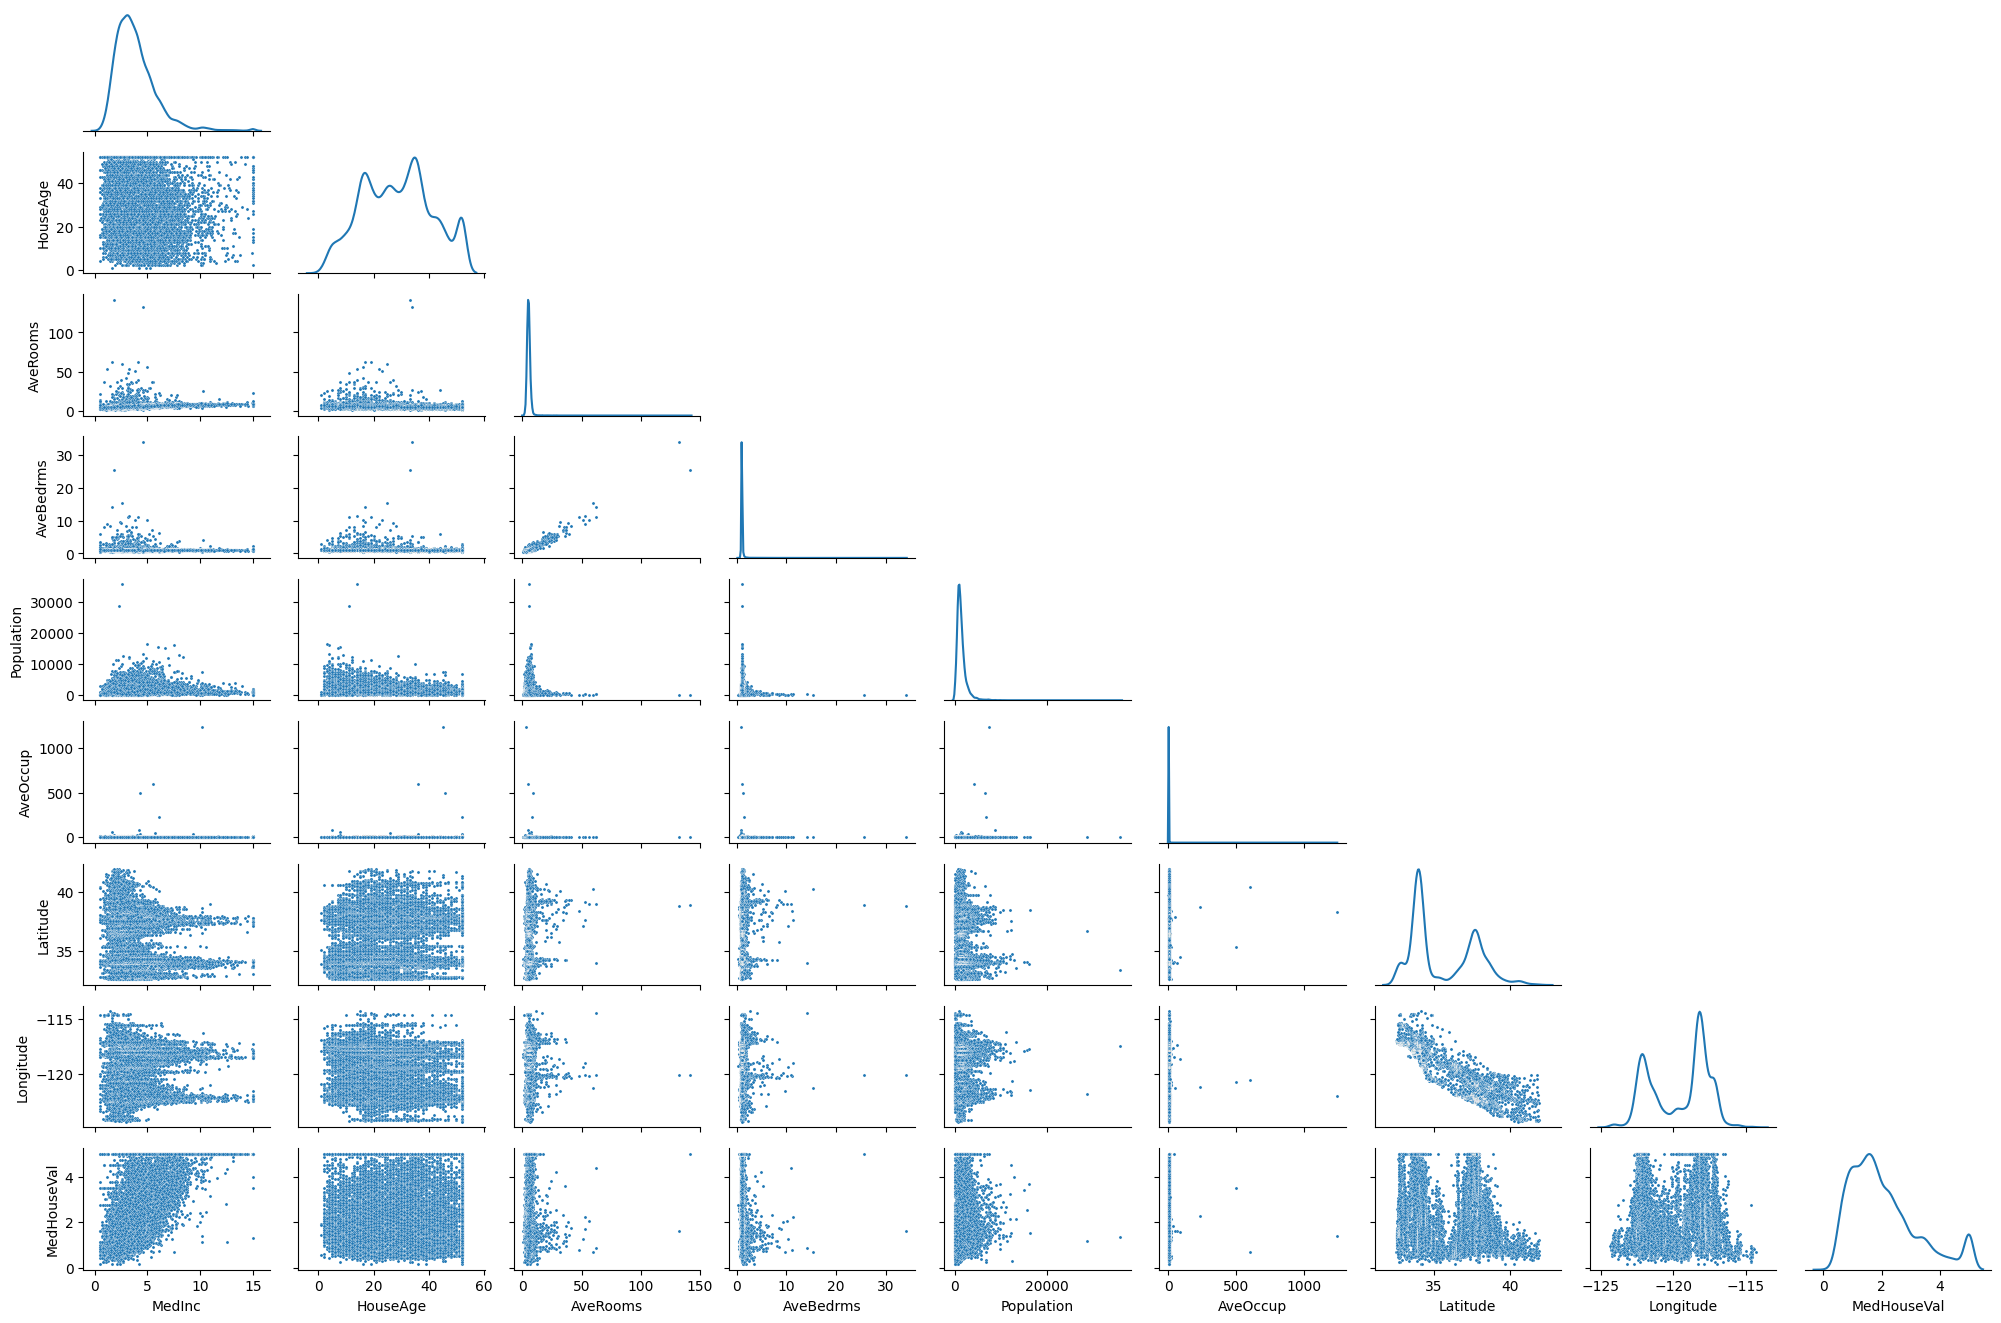

In [16]:
# Plot the california housing dataset 

# Load into pandas
merged_california = pd.concat([pd.DataFrame(X_california, columns=california.feature_names), pd.DataFrame(y_california, columns=['MedHouseVal'])], axis=1)

g = sns.PairGrid(merged_california, diag_sharey=False, corner=True, height=1.5, aspect=1.5, dropna=True)
g.map_lower(sns.scatterplot,s=5)
g.map_diag(sns.kdeplot)

### Decision Trees - Regression <a class="anchor" id="reg_decision_tree"></a>

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Decision tree regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_california, y_train_california)

# Predict the test data
y_pred_california = tree_reg.predict(X_test_california)

# get mean squared error to analyse prediction error
mse = mean_squared_error(y_test_california, y_pred_california)
rmse = np.sqrt(mse)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  0.4834040058565891
Root Mean Squared Error:  0.6952726126179494


### Model Parameters <a class="anchor" id="reg_params"></a>

In [28]:
# Get the Parameters of the tree (depth, number of nodes, etc.)
clf = tree_reg
n_nodes = clf.get_depth()
n_leaves = clf.get_n_leaves()
model_params = clf.get_params()
model_params_df_dt_clf = pd.DataFrame([model_params]).T
print(f"Metrics for regression tree:")
print(f"nodes: {n_nodes},")
print(f"leaves: {n_leaves},") 
print(f"model parameters:")
display(model_params_df_dt_clf)
print("\n")
# Probably don't plot this tree ... It's probably quite large.

Metrics for regression tree:
nodes: 23,
leaves: 316,
model parameters:


,0
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0
monotonic_cst,None


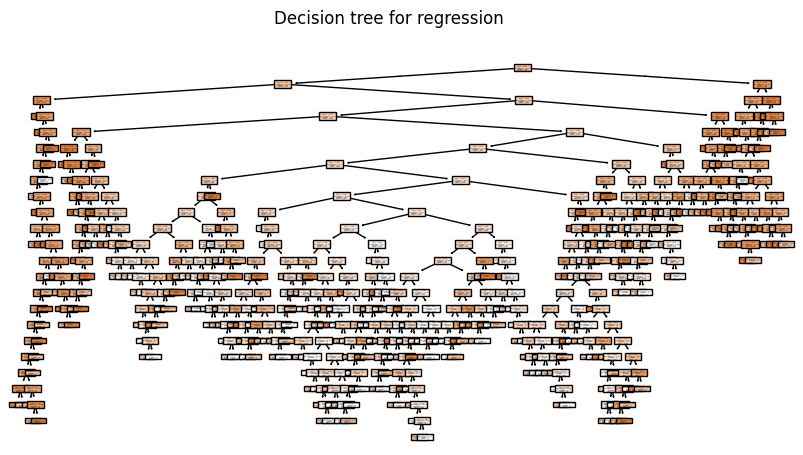

In [29]:
clf = tree_reg
fig = plt.figure(figsize=(10, 5))
plt.suptitle(f"Decision tree for regression")
tree.plot_tree(clf, filled=True)
plt.show()
fig.clear()

### Feature Importance <a class="anchor" id="reg_feat_imp"></a>

[0.5202235 0.4797765]


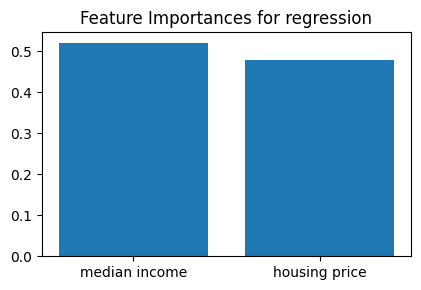

In [74]:
# Get the feature importance
importances = tree_reg.feature_importances_
print(importances)

# Define the number of rows and columns for the subplot grid
num_datasets = 1
cols = 3  # Number of columns
rows = (num_datasets + cols - 1) // cols  # Calculate the required rows dynamically

# Create the subplot figure
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))  # Adjust the size as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

#plot the feature importances
clf = tree_reg
importances = clf.feature_importances_

# Plot feature importances
axes[0].bar(range(len(importances)), importances)
axes[0].set_xticks(range(len(importances)))
labels = ["median income", "housing price"]
axes[0].set_xticklabels(labels)
axes[0].set_title(f"Feature Importances for regression")

# Remove unused subplots (if any)
for j in range(num_datasets, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

### Gradient Boosting vs. Random Forests - Regression <a class="anchor" id="reg_ensemble"></a>

In [93]:
# Train a Gradient Boosting Regressor and Random Forest Regressor
from sklearn import ensemble

#gradient boosting regressor
grad_reg = ensemble.GradientBoostingRegressor()
grad_reg.fit(X_train_california, y_train_california)

mse_grad = mean_squared_error(y_test_california, grad_reg.predict(X_test_california))
print("The mean squared error (MSE) on the test set is: ", mse_grad)

train_accuracy_california = grad_reg.score(X_train_california, y_train_california)
print("The training accuracy is: ", train_accuracy_california)

test_accuracy_california = grad_reg.score(X_test_california, y_test_california)
print("The test accuracy is: ", test_accuracy_california)

#random forest regressor
rf_reg = ensemble.RandomForestRegressor()
rf_reg.fit(X_train_california, y_train_california)

mse_rf = mean_squared_error(y_test_california, rf_reg.predict(X_test_california))
print("The mean squared error (MSE) on the test set is: ", mse_rf)

train_accuracy_california = rf_reg.score(X_train_california, y_train_california)
print("The training accuracy is: ", train_accuracy_california)

test_accuracy_california = rf_reg.score(X_test_california, y_test_california)
print("The test accuracy is: ", test_accuracy_california)

# For each model, print the training accuracy, test accuracy, mean squared error

The mean squared error (MSE) on the test set is:  0.2939973248643864
The training accuracy is:  0.8048978817773166
The test accuracy is:  0.7756446042829697
The mean squared error (MSE) on the test set is:  0.25310421855124665
The training accuracy is:  0.9732065124339537
The test accuracy is:  0.8068509734334885


### Model parameters <a class="anchor" id="reg_ensemble_params"></a>

In [94]:
# Print the parameters of the models
clf = grad_reg
model_params = clf.get_params()
model_params_df_dt_clf = pd.DataFrame([model_params]).T
print(f"Metrics for gradient boosting regression:")
display(model_params_df_dt_clf)
print("\n")

clf = rf_reg
model_params = clf.get_params()
model_params_df_dt_clf = pd.DataFrame([model_params]).T
print(f"Metrics for gradient boosting regression:")
display(model_params_df_dt_clf)
print("\n")

Metrics for gradient boosting regression:


,0
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,squared_error
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0




Metrics for gradient boosting regression:


,0
bootstrap,True
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2


### Visualizing the ensemble models <a class="anchor" id="reg_ensemble_visualize"></a>

In [95]:
# Plot a few trees from the models
clf = grad_reg
fig = plt.figure(figsize=(10, 5))
plt.suptitle(f"Decision tree for gradient boosting regression")
tree.plot_tree(clf, filled=True)
plt.show()
fig.clear()

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got GradientBoostingRegressor() instead.

<Figure size 1000x500 with 0 Axes>

In [96]:
clf = rf_reg
fig = plt.figure(figsize=(10, 5))
plt.suptitle(f"Decision tree for random forest regression")
tree.plot_tree(clf, filled=True)
plt.show()
fig.clear()

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got RandomForestRegressor() instead.

<Figure size 1000x500 with 0 Axes>

### Model Tuning <a class="anchor" id="reg_tuning"></a>

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4],
    'max_features': [2, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 100]
}

# Grid search for Gradient Boosting Regressor
# Grid search for Random Forest Regressor

### Model Parameters <a class="anchor" id="reg_tuned_params"></a>

In [ ]:
# Print the best parameters and the accuracy of the models

### Feature Engineering! <a class="anchor" id="reg_feat_eng"></a>

Can we improve the performance of our models by engineering new features?

In [247]:
# Load the california housing dataset for regression

In [248]:
# Make some new features from the existing features! For example, you could multiply two features together, or take the square of a feature. Take the ratios of features, or the log of a feature. Be creative!

### Plot the new features <a class="anchor" id="reg_feat_eng_plot"></a>

In [ ]:
# Plot the new features, and see if they have a linear relationship with the target variable

### Train ensemble models on the new features <a class="anchor" id="reg_ensemble_feat_eng"></a>

In [ ]:
# Train a Gradient Boosting and Random Forest regression model on the new features, and compare the training and test accuracy with the previous models 

### Feature Importance including new features <a class="anchor" id="reg_new_feat_imp"></a>

In [ ]:
# Plot the feature importances of the new models, were your new features important?